In [1]:
import numpy as np
import pandas as pd
dc_listings = pd.read_csv('F:/education/data quest/machine learning sessions/Airbnb/dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price_total(new_listing):
    temp_df = dc_listings.copy()
    ## Complete the function.
    temp_df['distance']=temp_df['accommodates'].apply(lambda x: np.abs(x-new_listing))
    temp_df=temp_df.sort_values('distance')
    k=temp_df.iloc[0:5]['price'].mean()
    return k
acc_one = predict_price_total(1)
acc_two = predict_price_total(2)
acc_four = predict_price_total(4)
print(acc_one,acc_two,acc_four)

79.6 109.6 133.0


In [6]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]
def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)
print(test_df['predicted_price'],test_df['price'])


3696    130.2
142     349.6
182     142.6
1678    130.2
2173    130.2
1716    142.6
2530    130.2
2329    245.8
2042    130.2
3266    130.2
3077    130.2
3169    142.6
98      225.8
2659    130.2
3523    130.2
931     130.2
572     130.2
1924    146.0
1273    142.6
224     142.6
106     146.0
1127     53.4
845     146.0
1413    130.2
3705    276.6
938     146.0
741     276.6
3498    146.0
2066    130.2
1272    130.2
        ...  
150     142.6
430     130.2
1596    801.8
366     146.0
1714    130.2
2475    130.2
1710    130.2
1305     53.4
749     142.6
49      130.2
802     130.2
1046    142.6
895     142.6
3313     53.4
2499    146.0
2700    142.6
3420    142.6
2553    276.6
942     146.0
1769    146.0
2005    245.8
59      130.2
1817    130.2
1248    146.0
2419    142.6
954     245.8
3186    130.2
2633    130.2
3563    130.2
1520    146.0
Name: predicted_price, Length: 931, dtype: float64 3696     70.0
142     300.0
182     210.0
1678    128.0
2173     79.0
1716    115.0
2530    100

C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


# lets us find the mean absolute error

In [7]:
test_df['squared_error']=np.absolute(test_df['predicted_price']-test_df['price'])
mae=test_df['squared_error'].mean()
print(mae)

67.04425349086964


C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# let us find the mean squared error

In [8]:
test_df['squared_terms']=(test_df['predicted_price']-test_df['price'])**2
mse=test_df['squared_terms'].mean()
print(mse)

16547.98543501601


C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


let us create another model with bathrooms as parameters instead of accomodates

In [9]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]
def predict_price_model2(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)
test_df['predicted_price'] = test_df['bathrooms'].apply(predict_price_model2)
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
print(mse)

17399.74414607941


C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import pandas as pd
import numpy as np
np.random.seed(1)
dc_listings = pd.read_csv('F:/education/data quest/machine learning sessions/Airbnb/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

In [11]:
drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [12]:
drop_additional_columns=['cleaning_fee','security_deposit']
dc_listings=dc_listings.drop(drop_additional_columns, axis=1)
dc_listings=dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())



accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [13]:
normalized_listings = (dc_listings - dc_listings.mean()) / (dc_listings.std())
normalized_listings['price']=dc_listings['price']
print(normalized_listings.head(3))

      accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858  125.0       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858   85.0       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858   50.0       -0.341375   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  


In [14]:
from scipy.spatial import distance
first_listing=normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing=normalized_listings.iloc[4][['accommodates','bathrooms']]
first_fifth_distance=distance.euclidean(first_listing,fifth_listing)
print(first_fifth_distance)

5.272543124668404


In [15]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']


knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])
print(predictions)

[  80.8  251.2   89.4   80.8   80.8   80.8  189.8  167.8  167.8  199.
  251.2  166.6   81.   276.8   80.8   80.8   80.8  166.6   76.2  982.2
   80.8  245.8  167.8  216.2   80.8   80.8  167.8  189.8  225.8   81.
   81.    80.8   80.8   80.8   80.8   80.8   80.8  166.6  225.8  245.4
  225.8   80.8   81.   167.8  135.2  167.8  167.8   80.8   80.8   80.8
   81.    80.8   80.8   80.8  188.   135.2   92.4  145.8   80.8  251.2
   80.8  135.2  167.8   90.4   80.8  135.2   80.8   80.8   80.8  135.2
  166.6  223.6   80.8  135.2   80.8  135.2   80.8  106.8   80.8   80.8
   80.8  135.2  251.2  189.8   80.8   80.8   80.8  135.2   89.4  276.8
  199.    81.    81.    80.8   80.8  304.6  135.2  135.2  135.2  167.8
   80.8  135.2   80.8  216.2  167.8   80.8   81.    80.8   80.8   89.4
  225.8   80.8  189.8  238.   106.8   81.   167.8  188.   277.6  135.2
   80.8  167.8   80.8  167.8   80.8  534.   135.2  167.8  167.8   62.8
  167.8   80.8  135.2   80.8   80.8   80.8  166.6   80.8   90.4  251.2
  167.8 

# to see for only one variable acccomodates

In [16]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates']


knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])
print(predictions)

from sklearn.metrics import mean_squared_error
two_features_mse=mean_squared_error(test_df['price'],predictions)
two_features_rmse=two_features_mse**(0.5)
print(two_features_mse,two_features_rmse)

[ 94.2 158.8  94.2  94.2  94.2  94.2 158.8 152.6 152.6 159.6 158.8  94.2
  55.2 159.6  94.2  94.2  94.2  94.2  55.2 453.6  94.2 158.8 152.6 152.6
  94.2  94.2 152.6 158.8 159.6  55.2  55.2  94.2  94.2  94.2  94.2  94.2
  94.2  94.2 159.6 263.6 159.6  94.2  55.2 152.6 129.8 152.6 152.6  94.2
  94.2  94.2  55.2  94.2  94.2  94.2 159.6 129.8 129.8 129.8  94.2 158.8
  94.2 129.8 152.6  94.2  94.2 129.8  94.2  94.2  94.2 129.8  94.2 287.4
  94.2 129.8  94.2 129.8  94.2 158.8  94.2  94.2  94.2 129.8 158.8 158.8
  94.2  94.2  94.2 129.8  94.2 159.6 159.6  55.2  55.2  94.2  94.2 263.6
 129.8 129.8 129.8 152.6  94.2 129.8  94.2 152.6 152.6  94.2  55.2  94.2
  94.2  94.2 159.6  94.2 158.8 152.6 158.8  55.2 152.6 159.6 297.8 129.8
  94.2 152.6  94.2 152.6  94.2 263.6 129.8 152.6 152.6  55.2 152.6  94.2
 129.8  94.2  94.2  94.2  94.2  94.2  94.2 158.8 152.6 129.8  94.2 159.6
 152.6  94.2  55.2  55.2  94.2 129.8 152.6  94.2 159.6 152.6  55.2 152.6
 159.6 129.8  94.2  94.2 152.6  94.2 159.6 129.8 15

# thus we see that when we trained 2 univariant models with accomodation variable in the 1st one and bathrooms in the 2nd. We observe that traning the models with both vairiables combined yielded to a lower mean squared error and root mean squared error.

# # Now let us train the model through four variables

In [17]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features],train_df['price'])
four_predictions=knn.predict(test_df[features])
from sklearn.metrics import mean_squared_error
four_mse=mean_squared_error(test_df['price'],four_predictions)
four_rmse=four_mse**(0.5)
print(four_mse,four_rmse)

13322.432400455064 115.42284176217056


# As the features increased we see lower error

# Now let us experiment and use all the features except price value and we see that selecting all or lots of features doesn't  guarentee better effeciency.

In [18]:
features=train_df.columns.tolist()
features.remove('price')
print(features)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features],train_df['price'])
all_features_predictions=knn.predict(test_df[features])
from sklearn.metrics import mean_squared_error
all_features_mse=mean_squared_error(test_df['price'],all_features_predictions)
all_features_rmse=four_mse**(0.5)
print(all_features_mse,all_features_rmse)

['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews']
15455.275631399316 115.42284176217056


# Checking all the parameters that are not dependant on data like K  (Hyper parameter optimization)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
hyper_params=[i for i in range(1,6)]
features=['accommodates','bedrooms','bathrooms','number_of_reviews']
print(hyper_params)
mse_values=[]
for x in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=x,algorithm='brute')
    knn.fit(train_df[features],train_df['price'])
    predictions=knn.predict(test_df[features])
    mse=mean_squared_error(test_df['price'],predictions)
    mse_values.append(mse)
print(mse_values)    

[1, 2, 3, 4, 5]
[25897.758816837315, 14829.874004550626, 14507.932625458221, 14633.708333333334, 13322.432400455064]


# let us check for more k values

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
hyper_params=[i for i in range(1,21)]
features=['accommodates','bedrooms','bathrooms','number_of_reviews']
mse_values=[]
for x in hyper_params:
    knn=KNeighborsRegressor(n_neighbors=x,algorithm='brute')
    knn.fit(train_df[features],train_df['price'])
    predictions=knn.predict(test_df[features])
    mse=mean_squared_error(test_df['price'],predictions)
    mse_values.append(mse)
print(mse_values)  
print(min(mse_values))

[25897.758816837315, 14829.874004550626, 14507.932625458221, 14633.708333333334, 13322.432400455064, 12903.254708633547, 13126.052448283068, 13380.156054465302, 13654.969325411872, 14103.407940841866, 14133.00453182147, 14372.550246492225, 14475.569972602003, 14437.902527222492, 14520.491032739223, 14620.297741574232, 14708.674157878368, 14665.33477647158, 14639.924246578365, 14572.638831058024]
12903.254708633547


# Visualization of k depency

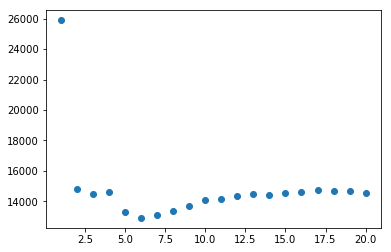

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params,mse_values)
plt.show()

# the lowest is at k=6 hence it is the optimal value that should be considered.

# In the previous experimental attempt we used all parameters except 'price' and saw the output which was not a better effeciency than only 4 parameters that we choose before.Hence we concluded that effeciency doesn't increase on increasing features instead perfect features are required.
In hyperparameter optimization we learned that an optimum k can be found by grid search method. Now let us experiment to find an optimal k for all the parameteres except 'price' to see if the effeciency is improving.

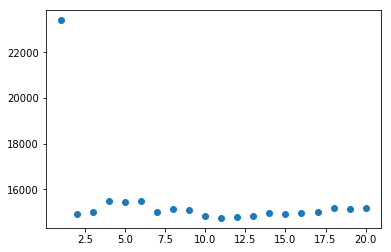

In [32]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features=train_df.columns.tolist()
features.remove('price')

for x in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=x, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params,mse_values)
plt.show()

# Now let us try again the previous model with all features except 'price'with k=2

In [33]:
features=train_df.columns.tolist()
features.remove('price')
print(features)

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2, algorithm='brute')
knn.fit(train_df[features],train_df['price'])
all_features_predictions=knn.predict(test_df[features])
from sklearn.metrics import mean_squared_error
all_features_mse=mean_squared_error(test_df['price'],all_features_predictions)
all_features_rmse=four_mse**(0.5)
print(all_features_mse,all_features_rmse)

['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'number_of_reviews']
14917.095278725825 115.42284176217056


# Now we see a better result than the previous where hyperparameter optimization wasn't done,but still this result is not the best that we obtained when we used only 4 parameters with k=6 hyperparameter optimization.

# lets do hyperparameter optimization to model with only two features and three features.


In [34]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]

two_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
three_mse_values = list()
for x in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=x, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)
    
temp=two_mse_values[0]
temp_key=1

for key,val in enumerate(two_mse_values):
#when enumerate is used key starts from 0    
    if (val<temp):
        temp=val
        temp_key=key+1
two_hyp_mse[temp_key] = temp  

for x in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=x, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
    
temp=three_mse_values[0]
temp_key=1
for key,val in enumerate(three_mse_values):
#when enumerate is used key starts from 0    
    if (val<temp):
        temp=val
        temp_key=key+1
three_hyp_mse[temp_key] = temp      
    
print(two_hyp_mse,three_hyp_mse)

{6: 15587.77528125395} {5: 13285.701069397044}


# For a matter of fact 13285 is the least error that we have found in this entire project till now which is only by using three features and hyperparameter optimization.(Even lesser error than 4 features model + hp optimization)

# Let us use holdout validation technique

In [19]:
'''import numpy as np
import pandas as pd

dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')'''

shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

split_one=dc_listings.iloc[0:1862]
split_two=dc_listings.iloc[1862:]


In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# holdout validation is when training and testing set is 50% and then both gets exchanges and we find the mean of errors.
train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
# 1st case
knn=KNeighborsRegressor(algorithm='auto',n_neighbors=5)
knn.fit(train_one[['accommodates']],train_one['price'])
predictions=knn.predict(test_one[['accommodates']])
iteration_one_mse=mean_squared_error(test_one['price'],predictions)
iteration_one_rmse=iteration_one_mse**(0.5)
#2nd case
knn=KNeighborsRegressor(algorithm='auto',n_neighbors=5)
knn.fit(train_two[['accommodates']],train_two['price'])
predictions=knn.predict(test_two[['accommodates']])
iteration_two_mse=mean_squared_error(test_two['price'],predictions)
iteration_two_rmse=iteration_two_mse**(0.5)

avg_rmse=np.mean([iteration_two_rmse,iteration_one_rmse])

print(iteration_one_rmse,iteration_two_rmse)
print(avg_rmse)

117.72468326695143 140.8295579907386
129.277120628845


# K- fold cross validation method (dividing data into k folds and alternately chosing 1 fold as the test data with rest as the train)

# case1

In [18]:
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings['fold'].value_counts())
print("\n Num of missing values: ", dc_listings['fold'].isnull().sum())

2.0    745
1.0    745
4.0    744
3.0    744
5.0    693
Name: fold, dtype: int64

 Num of missing values:  0


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_df=dc_listings[dc_listings['fold']!=1]
test_df=dc_listings[dc_listings['fold']==1]

train_columns = ['accommodates']


knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
knn.fit(train_df[train_columns], train_df['price'])
predictions = knn.predict(test_df[train_columns])

iteration_one_mse=mean_squared_error(test_df['price'],predictions)
iteration_one_rmse=iteration_one_mse**(0.5)
print(iteration_one_rmse)

105.45600004887692


# let us do the rest of task by defning a func train_and_validate

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


import numpy as np

fold_ids = [1,2,3,4,5]
def train_and_validate(df,folds):
    rmses=[]
    for x in folds:
        train_df=df[df['fold']!=x]
        test_df=df[df['fold']==x]
        train_columns = ['accommodates']
        knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
        knn.fit(train_df[train_columns], train_df['price'])
        test_df['predicted_price'] = knn.predict(test_df[train_columns])
        mse=mean_squared_error(test_df['price'],test_df['predicted_price'])
        rmse=mse**(0.5)
        rmses.append(rmse)
    avg_rmse=np.mean(rmses)    
    return rmses
k=train_and_validate(dc_listings,fold_ids)
print(k)
avg_rmse=np.mean(k)
print(avg_rmse)

C:\Users\neil pradhan\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


[105.45600004887692, 140.22399894167413, 153.35961918216583, 131.31358347216434, 114.07989529633392]
128.88661938824302


In [22]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)
knn=KNeighborsRegressor()
mses=cross_val_score(knn,dc_listings[['accommodates']],dc_listings['price'],cv=kf,scoring="neg_mean_squared_error")
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
print(rmses)
print(avg_rmse)

[148.57324706 108.34713663 137.74874572 108.02754316 139.79990703]
128.49931592107862


# Choosing the right k is very essential. when k=2(hold out validation) where as when k=n=(no of observations) LOOCV
let us experiment with different k values.

In [25]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
l=[]
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    l.append(avg_rmse)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))
print("all_avg_rmses=",l)

3 folds:  avg RMSE:  123.17064375729854 std RMSE:  4.2689330359893765
5 folds:  avg RMSE:  128.49931592107862 std RMSE:  16.97893890878854
7 folds:  avg RMSE:  127.97513377042846 std RMSE:  20.49543527053172
9 folds:  avg RMSE:  123.61872669423639 std RMSE:  24.383915795024848
10 folds:  avg RMSE:  127.14768452083968 std RMSE:  24.12971080464867
11 folds:  avg RMSE:  127.6162429896584 std RMSE:  29.36740885935232
13 folds:  avg RMSE:  122.74835655496307 std RMSE:  32.37835226566323
15 folds:  avg RMSE:  122.75764540123978 std RMSE:  32.89326016096263
17 folds:  avg RMSE:  123.00505315300288 std RMSE:  35.48871237937227
19 folds:  avg RMSE:  122.14821235192935 std RMSE:  35.17365639938169
21 folds:  avg RMSE:  121.10942246881532 std RMSE:  37.115747446720576
23 folds:  avg RMSE:  124.93985894775318 std RMSE:  39.278718711279566
all_avg_rmses= [123.17064375729854, 128.49931592107862, 127.97513377042846, 123.61872669423639, 127.14768452083968, 127.6162429896584, 122.74835655496307, 122.75